In [14]:
# Cette ligne est exécutée pour ne pas répéter à chque fois plt.show()
%matplotlib inline
# import darts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

# 1. Building and manipulating timeseries

- Il existe plusieurs façons de la faire et parmis ces méthodes à partir de pandas `TimeSeries.from_dataframe()`
- Directement à partir de Numpy `TimeSeries.from_values()`
- À partir d'un fichier CSV `TimeSeries.from_csv()`
- À partir des données disponible dans la bibliothèque DARTS

## 1.1. Importer et créer une classe series

<Axes: xlabel='Month'>

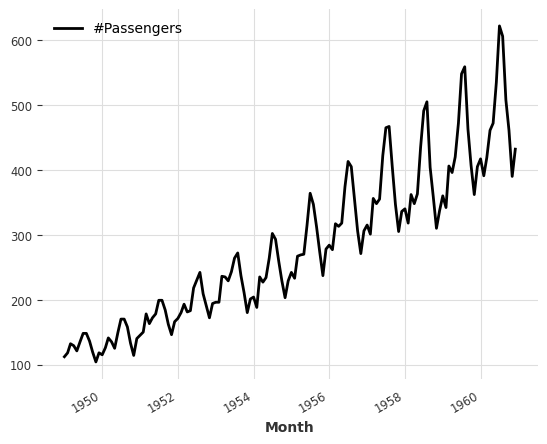

In [7]:
# Exemple 
series = AirPassengersDataset().load()
series.plot()

In [8]:
len(series)

144

## 1.2. Fractionner une Séries

<Axes: xlabel='Month'>

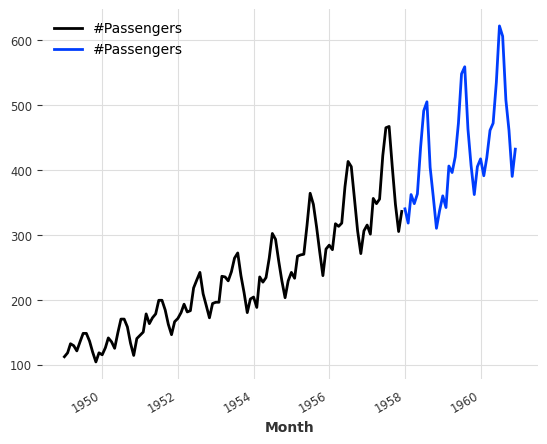

In [11]:
# Fractionnement en avant
series1, series2 = series.split_after(0.75)
series1.plot()
series2.plot()


## 1.3. Découper une séries

<Axes: xlabel='Month'>

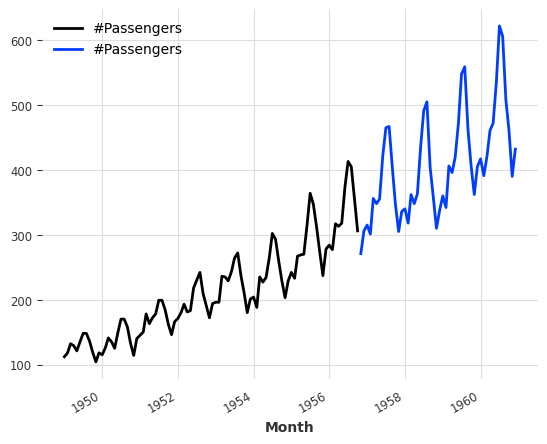

In [13]:
series1, series2 = series[:-50], series[-50:]
series1.plot()
series2.plot()

## 1.4. Opérations arithmétiques 

<Axes: xlabel='Month'>

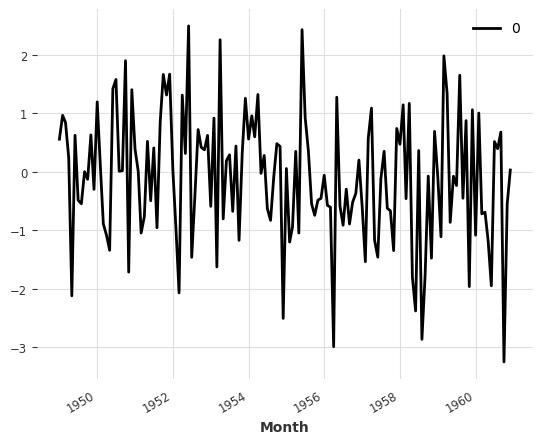

In [15]:
# Création d'un bruit(Création d'une séries à partir de valeurs)
series_noise = TimeSeries.from_times_and_values(
    series.time_index, np.random.randn(len(series))
)
series_noise.plot()

<Axes: xlabel='Month'>

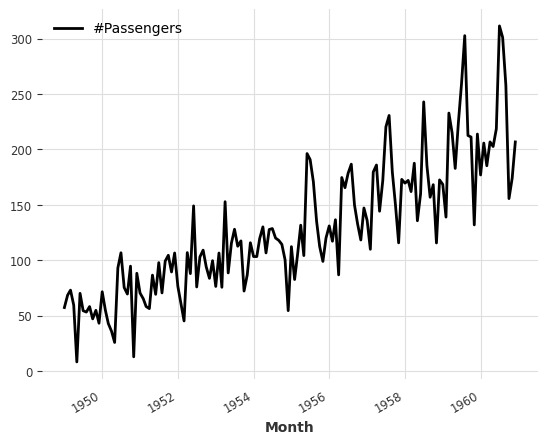

In [16]:
# Ajouter le bruit à la series
(series / 2 + 20 * series_noise - 10).plot()


## 1.5. Concaténation de séries

<Axes: xlabel='Month'>

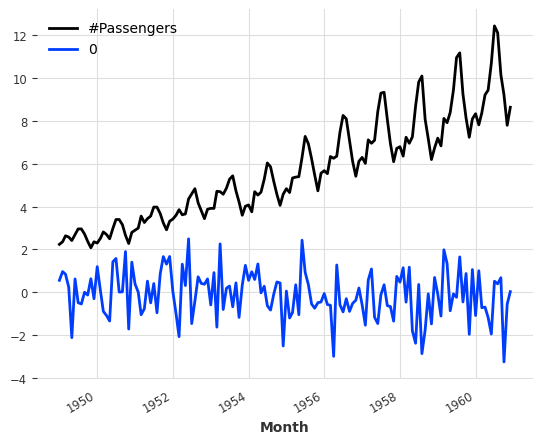

In [17]:
(series / 50).stack(series_noise).plot()


## 1.6. Mapping

<Axes: xlabel='Month'>

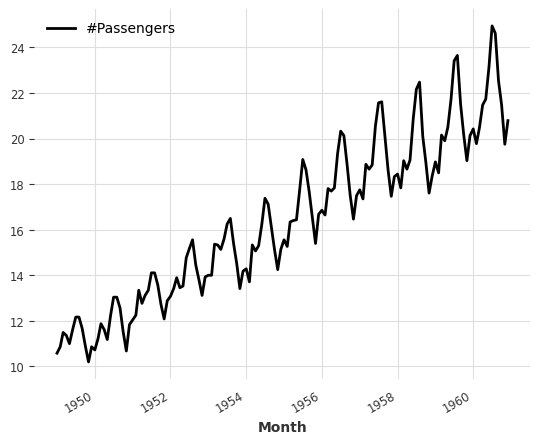

In [20]:
series.map(np.sqrt).plot()

## 1.7. Ajouter autres variables pour créer une séries chronologique multivariée

<Axes: xlabel='Month'>

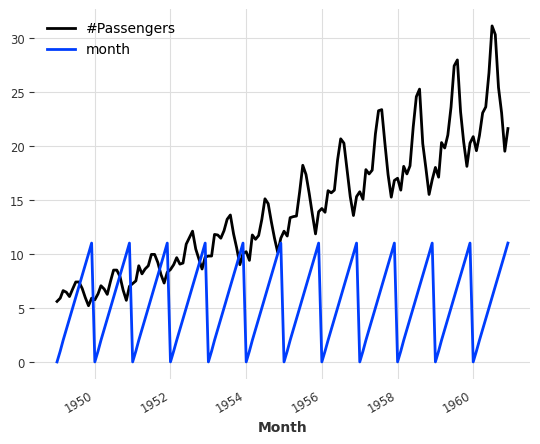

In [21]:
(series/20).add_datetime_attribute('month').plot()

## 1.8 Ajouter les jours fériés

<Axes: xlabel='Month'>

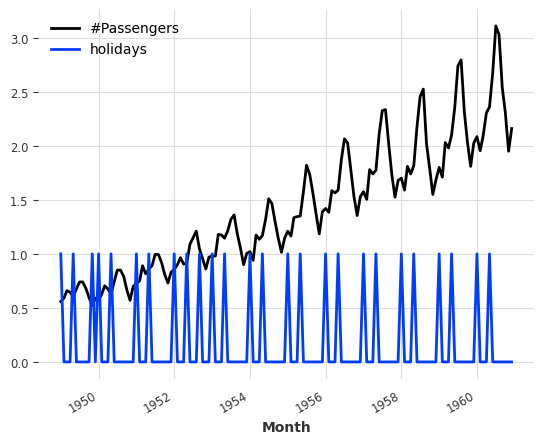

In [22]:
(series / 200).add_holidays("DZ").plot()


# 1.9. Remplir les valeurs manquantes 

<Axes: xlabel='time'>

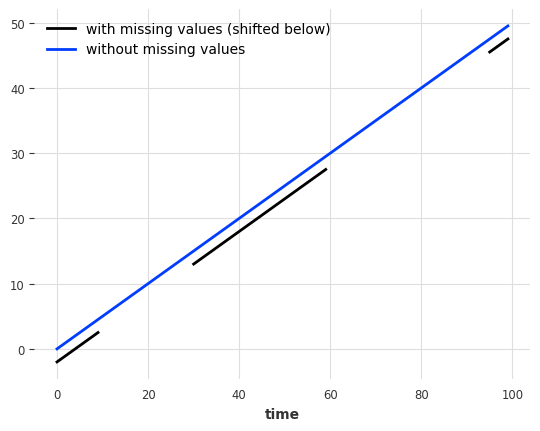

In [24]:
from darts.utils.missing_values import fill_missing_values

values = np.arange(50, step=0.5)
values[10:30] = np.nan
values[60:95] = np.nan
series_ = TimeSeries.from_values(values)

(series_ - 2).plot(label="with missing values (shifted below)")
fill_missing_values(series_).plot(label="without missing values")
